In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay,roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier


In [9]:
grp7_df = pd.read_csv(r"C:\Users\10b11\OneDrive\Desktop\CVD_cleaned.csv")

In [10]:
grp7_df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [11]:
grp7_df.head(10)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
5,Good,Within the past year,No,No,No,No,Yes,No,Yes,Male,60-64,183.0,154.22,46.11,No,0.0,12.0,12.0,12.0
6,Fair,Within the past year,Yes,Yes,No,No,No,No,Yes,Male,60-64,175.0,69.85,22.74,Yes,0.0,16.0,8.0,0.0
7,Good,Within the past year,Yes,No,No,No,No,No,Yes,Female,65-69,165.0,108.86,39.94,Yes,3.0,30.0,8.0,8.0
8,Fair,Within the past year,No,No,No,No,Yes,No,No,Female,65-69,163.0,72.57,27.46,Yes,0.0,12.0,12.0,4.0
9,Fair,Within the past year,No,No,No,No,No,Yes,Yes,Female,70-74,163.0,91.63,34.67,No,0.0,12.0,12.0,1.0


In [12]:
grp7_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [25]:
target = grp7_df["Heart_Disease"]

In [26]:
features = grp7_df.drop(["Heart_Disease"],axis=1)

In [69]:
from sklearn.preprocessing import OrdinalEncoder

# Identify categorical columns (same as before)
categorical_cols = features.select_dtypes(include='object').columns
print("Categorical columns identified:", categorical_cols.tolist())

# Apply one-hot encoding to categorical features
features_encoded = pd.get_dummies(features, columns=categorical_cols, drop_first=False)
print("\nShape of features_encoded DataFrame after one-hot encoding:", features_encoded.shape)
print("\nFirst 5 rows of features_encoded DataFrame:\n", features_encoded.head())



Categorical columns identified: ['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']

Shape of features_encoded DataFrame after one-hot encoding: (308854, 48)

First 5 rows of features_encoded DataFrame:
    Height_(cm)  Weight_(kg)    BMI  Alcohol_Consumption  Fruit_Consumption  \
0        150.0        32.66  14.54                  0.0               30.0   
1        165.0        77.11  28.29                  0.0               30.0   
2        163.0        88.45  33.47                  4.0               12.0   
3        180.0        93.44  28.73                  0.0               30.0   
4        191.0        88.45  24.37                  0.0                8.0   

   Green_Vegetables_Consumption  FriedPotato_Consumption  \
0                          16.0                     12.0   
1                           0.0                      4.0   
2                           3.0              

In [70]:
# Convert the target variable 'target' into a numerical format (0 for 'No', 1 for 'Yes')
target_encoded = target.map({'No': 0, 'Yes': 1})
print("\nFirst 5 values of target_encoded:", target_encoded.head())
print("\nValue counts of target_encoded:\n", target_encoded.value_counts())


First 5 values of target_encoded: 0    0
1    1
2    0
3    1
4    0
Name: Heart_Disease, dtype: int64

Value counts of target_encoded:
 Heart_Disease
0    283883
1     24971
Name: count, dtype: int64


In [71]:
print("\nData types of features_encoded DataFrame:\n", features_encoded.dtypes)


Data types of features_encoded DataFrame:
 Height_(cm)                                            float64
Weight_(kg)                                            float64
BMI                                                    float64
Alcohol_Consumption                                    float64
Fruit_Consumption                                      float64
Green_Vegetables_Consumption                           float64
FriedPotato_Consumption                                float64
General_Health_Excellent                                  bool
General_Health_Fair                                       bool
General_Health_Good                                       bool
General_Health_Poor                                       bool
General_Health_Very Good                                  bool
Checkup_5 or more years ago                               bool
Checkup_Never                                             bool
Checkup_Within the past 2 years                           bool
Checkup_Wit

In [72]:
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target_encoded, test_size=0.2, random_state=36)

In [73]:
lr = LogisticRegression()

In [74]:
lr.fit(X_train,y_train)

LogisticRegression()

In [75]:
# 1. Make predictions on the test set
y_pred = lr.predict(X_test)
print("First 5 predictions (y_pred):\n", y_pred[:5])

First 5 predictions (y_pred):
 [0 0 0 0 0]



Accuracy: 0.9188
Precision: 0.4576
Recall: 0.0632
F1-score: 0.1110

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     56815
           1       0.46      0.06      0.11      4956

    accuracy                           0.92     61771
   macro avg       0.69      0.53      0.53     61771
weighted avg       0.89      0.92      0.89     61771



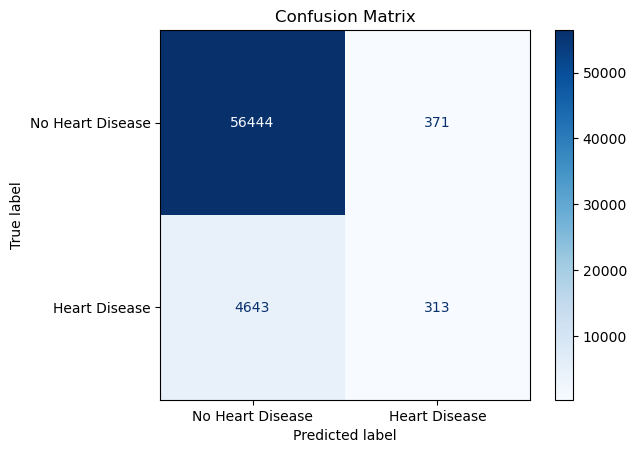

In [76]:
#Calculate and Print accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Generate and print a classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Create and display a confusion matrix
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Heart Disease', 'Heart Disease'])
display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [77]:
# Instantiate the SMOTE object with a random_state for reproducibility
smote = SMOTE(random_state=42)
print("SMOTE object instantiated successfully.")

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Training data resampled using SMOTE.")

# Print the new class distribution of y_train_resampled
print("\nNew class distribution after SMOTE:")
print(y_train_resampled.value_counts())

SMOTE object instantiated successfully.
Training data resampled using SMOTE.

New class distribution after SMOTE:
Heart_Disease
1    227068
0    227068
Name: count, dtype: int64


In [78]:
rf = RandomForestClassifier(n_estimators=100,random_state=36)

In [79]:
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=36)

In [80]:
 # Make predictions on the test set using the Random Forest model
y_pred_rf = rf.predict(X_test)
print("First 5 predictions from Random Forest model (y_pred_rf):\n", y_pred_rf[:5])

First 5 predictions from Random Forest model (y_pred_rf):
 [0 0 0 0 0]



Random Forest Model Performance:
Accuracy: 0.9171
Precision: 0.3965
Recall: 0.0642
F1-score: 0.1105

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     56815
           1       0.40      0.06      0.11      4956

    accuracy                           0.92     61771
   macro avg       0.66      0.53      0.53     61771
weighted avg       0.88      0.92      0.89     61771



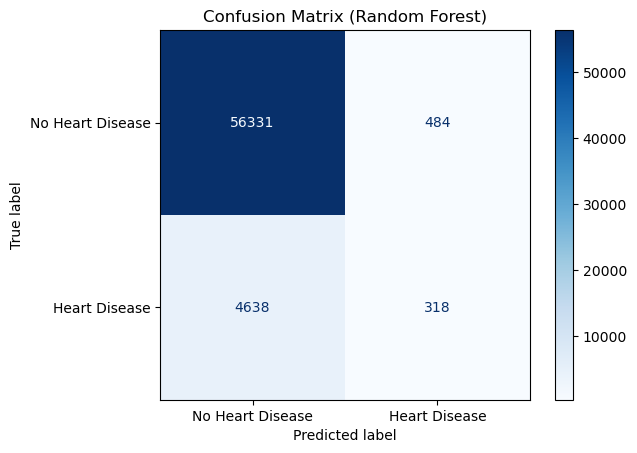

In [81]:
# Calculate accuracy, precision, recall, and F1-score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print the calculated metrics, formatting them to four decimal places
print(f"\nRandom Forest Model Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")

# Generate and print a classification report
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

# Compute the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix
display_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No Heart Disease', 'Heart Disease'])
display_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Random Forest)')
plt.show()

In [82]:
# Access the feature_importances_ attribute
importances = rf.feature_importances_

# Create a Pandas Series mapping importance values to feature names
feature_importances = pd.Series(importances, index=X_train_resampled.columns)

# Sort the features by importance in descending order
sorted_feature_importances = feature_importances.sort_values(ascending=False)

# Print the head of the sorted feature importances
print("Top 10 Feature Importances (Random Forest):")
print(sorted_feature_importances.head(10))

Top 10 Feature Importances (Random Forest):
Arthritis_Yes          0.084198
General_Health_Fair    0.066414
Diabetes_Yes           0.062410
Smoking_History_Yes    0.057409
Age_Category_80+       0.046297
Smoking_History_No     0.044002
Arthritis_No           0.042703
General_Health_Poor    0.034063
General_Health_Good    0.030162
Age_Category_75-79     0.029093
dtype: float64


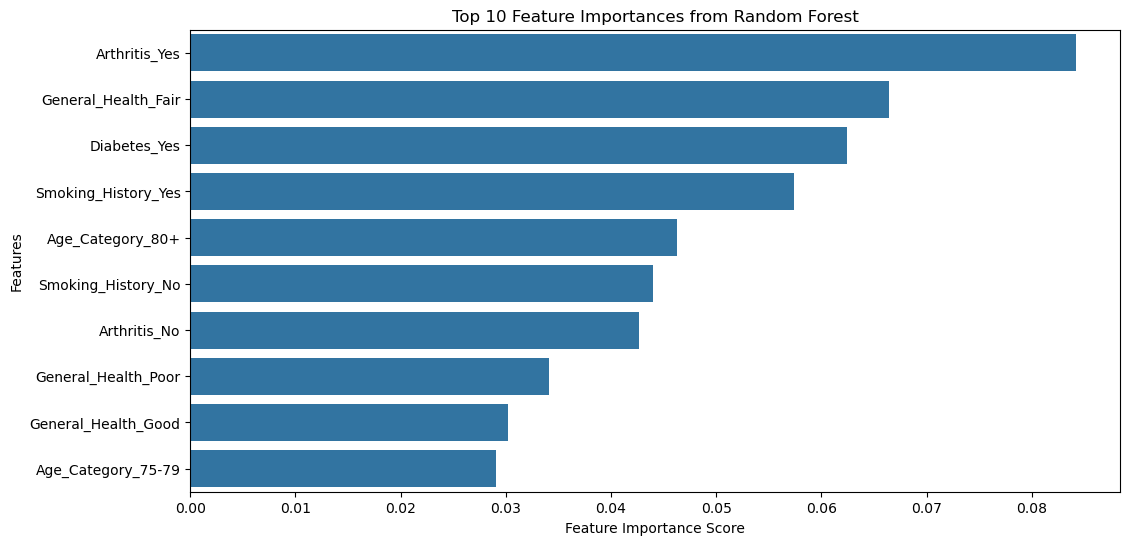

In [83]:
#Visualize the top N feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_feature_importances.head(10).values, y=sorted_feature_importances.head(10).index)
plt.title('Top 10 Feature Importances from Random Forest')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

In [84]:
#ROC Curve

# Get probability estimates
rf_probs = rf.predict_proba(X_test)[:, 1]
log_probs = lr.predict_proba(X_test)[:, 1]

# Compute ROC curve values
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
log_fpr, log_tpr, _ = roc_curve(y_test, log_probs)

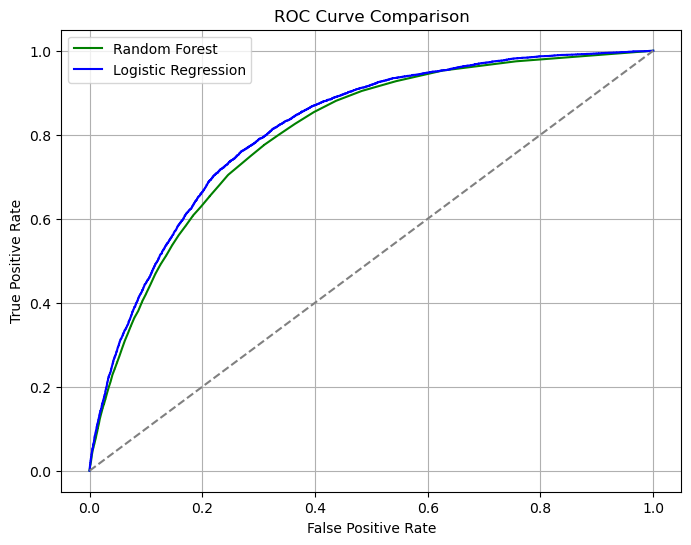

In [85]:
 # Plot ROC Curves

plt.figure(figsize=(8,6))
plt.plot(rf_fpr, rf_tpr, color='green', label=f'Random Forest')
plt.plot(log_fpr, log_tpr, color='blue', label=f'Logistic Regression')

# Diagonal line (random model)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

In [86]:
# Create a DataFrame to combine actual, predicted, and features for analysis
misclassification_analysis_df = X_test.copy()
misclassification_analysis_df['Actual'] = y_test
misclassification_analysis_df['Predicted'] = y_pred_rf

# Filter for misclassified samples
misclassified_samples = misclassification_analysis_df[misclassification_analysis_df['Actual'] != misclassification_analysis_df['Predicted']]

print("Total number of misclassified samples:", len(misclassified_samples))
print("\nFirst 5 misclassified samples (Actual vs. Predicted):")
print(misclassified_samples[['Actual', 'Predicted']].head())

Total number of misclassified samples: 5122

First 5 misclassified samples (Actual vs. Predicted):
        Actual  Predicted
6363         1          0
192257       1          0
279170       1          0
8073         1          0
214815       1          0


In [87]:
# Identify False Negatives (Actual=1, Predicted=0)
false_negatives = misclassified_samples[(misclassified_samples['Actual'] == 1) & (misclassified_samples['Predicted'] == 0)]

print(f"Number of False Negatives: {len(false_negatives)}")

# Display the top features for the first few False Negatives
# Using the top 5 features identified previously
top_features = sorted_feature_importances.head(5).index.tolist()

print("\nTop features for the first 5 False Negative samples:")
print(false_negatives[top_features + ['Actual', 'Predicted']].head())

Number of False Negatives: 4638

Top features for the first 5 False Negative samples:
        Arthritis_Yes  General_Health_Fair  Diabetes_Yes  Smoking_History_Yes  \
6363            False                False         False                False   
192257          False                 True         False                 True   
279170          False                 True         False                 True   
8073             True                False         False                 True   
214815           True                False          True                False   

        Age_Category_80+  Actual  Predicted  
6363               False       1          0  
192257              True       1          0  
279170             False       1          0  
8073                True       1          0  
214815             False       1          0  


In [88]:
# Identify False Positives (Actual=0, Predicted=1)
false_positives = misclassified_samples[(misclassified_samples['Actual'] == 0) & (misclassified_samples['Predicted'] == 1)]

print(f"Number of False Positives: {len(false_positives)}")

# Display the top features for the first few False Positives
# Using the top 5 features identified previously
top_features = sorted_feature_importances.head(5).index.tolist()

print("\nTop features for the first 5 False Positive samples:")
print(false_positives[top_features + ['Actual', 'Predicted']].head())

Number of False Positives: 484

Top features for the first 5 False Positive samples:
        Arthritis_Yes  General_Health_Fair  Diabetes_Yes  Smoking_History_Yes  \
252219           True                False          True                 True   
175559           True                False         False                 True   
15771           False                 True         False                 True   
148378          False                 True         False                 True   
113452           True                False         False                 True   

        Age_Category_80+  Actual  Predicted  
252219             False       0          1  
175559              True       0          1  
15771              False       0          1  
148378              True       0          1  
113452             False       0          1  


In [90]:
#  Get the predicted probabilities for the positive class (class 1)
# rf_model.predict_proba returns probabilities for both classes [prob_class_0, prob_class_1]
probabilities = rf.predict_proba(X_test)[:, 1]

print("First 5 predicted probabilities for the positive class:")
print(probabilities[:5])

First 5 predicted probabilities for the positive class:
[0.19 0.13 0.26 0.01 0.35]


In [91]:
# Define a range of thresholds to test
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Prepare a list to store results for each threshold
results = []

for threshold in thresholds:
    # Apply the new threshold to get binary predictions
    y_pred_threshold = (probabilities >= threshold).astype(int)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_threshold)
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)

    # Store the results
    results.append({
        'Threshold': threshold,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    })

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results)

print("Model Performance with Different Thresholds:")
print(results_df.round(4))

Model Performance with Different Thresholds:
   Threshold  Accuracy  Precision  Recall  F1-score
0        0.1    0.7172     0.1862  0.7492    0.2983
1        0.2    0.8357     0.2474  0.5127    0.3337
2        0.3    0.8870     0.3015  0.3099    0.3057
3        0.4    0.9089     0.3515  0.1598    0.2197
4        0.5    0.9166     0.3907  0.0710    0.1202
5        0.6    0.9192     0.4403  0.0260    0.0492
6        0.7    0.9198     0.4921  0.0063    0.0124
7        0.8    0.9197     0.2857  0.0004    0.0008
8        0.9    0.9198     0.0000  0.0000    0.0000


Selected classification threshold: 0.2

Classification Report with Threshold 0.2:
               precision    recall  f1-score   support

           0       0.95      0.86      0.91     56815
           1       0.25      0.51      0.33      4956

    accuracy                           0.84     61771
   macro avg       0.60      0.69      0.62     61771
weighted avg       0.90      0.84      0.86     61771



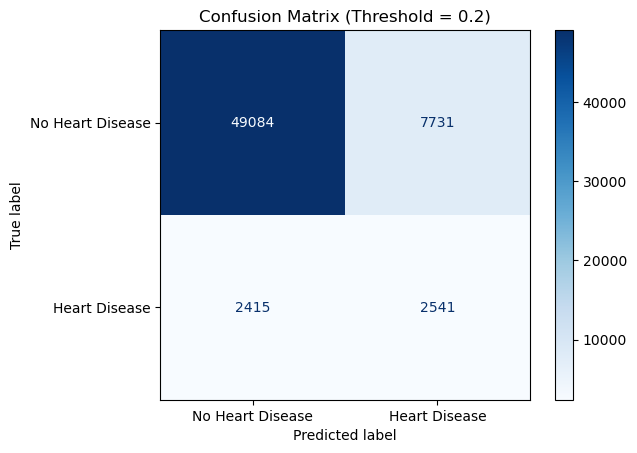

In [96]:
# Choose an optimal threshold based on the results_df (e.g., to maximize recall for the minority class while considering other metrics)
# For example, let's select threshold = 0.2, as it significantly increases recall compared to 0.5

selected_threshold = 0.2
print(f"Selected classification threshold: {selected_threshold}")

# Generate predictions with the selected threshold
y_pred_tuned = (probabilities >= selected_threshold).astype(int)

# Print the classification report with the new threshold
print(f"\nClassification Report with Threshold {selected_threshold}:\n", classification_report(y_test, y_pred_tuned, zero_division=0))

# Create and display a confusion matrix with the new threshold
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
display_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_tuned, display_labels=['No Heart Disease', 'Heart Disease'])
display_tuned.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix (Threshold = {selected_threshold})')
plt.show()

In [93]:
# Create a DataFrame named results_df_tuned by copying X_test
results_df_tuned = X_test.copy()

# Add a new column 'Actual' to results_df_tuned using the y_test series
results_df_tuned['Actual'] = y_test

# Add another new column 'Predicted' to results_df_tuned using the y_pred_tuned array
results_df_tuned['Predicted'] = y_pred_tuned

# 4. Filter results_df_tuned to create a new DataFrame called misclassified_samples_tuned
# where the 'Actual' column is not equal to the 'Predicted' column.
misclassified_samples_tuned = results_df_tuned[results_df_tuned['Actual'] != results_df_tuned['Predicted']]

# 5. Print the total number of misclassified samples
print("Total number of misclassified samples with tuned threshold:", len(misclassified_samples_tuned))

# 6. Display the first 5 rows of the misclassified_samples_tuned DataFrame,
# specifically showing the 'Actual' and 'Predicted' columns.
print("\nFirst 5 misclassified samples with tuned threshold (Actual vs. Predicted):")
print(misclassified_samples_tuned[['Actual', 'Predicted']].head())

Total number of misclassified samples with tuned threshold: 10146

First 5 misclassified samples with tuned threshold (Actual vs. Predicted):
        Actual  Predicted
6363         1          0
274874       0          1
37428        0          1
279170       1          0
214815       1          0


In [94]:
# Identify False Negatives (Actual=1, Predicted=0) from misclassified_samples_tuned
false_negatives_tuned = misclassified_samples_tuned[(misclassified_samples_tuned['Actual'] == 1) & (misclassified_samples_tuned['Predicted'] == 0)]

print(f"Number of False Negatives with tuned threshold: {len(false_negatives_tuned)}")

# Display the top features for the first few False Negatives
# Using the top 5 features identified previously
# top_features is already available from previous cells

print("\nTop features for the first 5 False Negative samples (tuned threshold):")
print(false_negatives_tuned[top_features + ['Actual', 'Predicted']].head())

Number of False Negatives with tuned threshold: 2415

Top features for the first 5 False Negative samples (tuned threshold):
        Arthritis_Yes  General_Health_Fair  Diabetes_Yes  Smoking_History_Yes  \
6363            False                False         False                False   
279170          False                 True         False                 True   
214815           True                False          True                False   
115302          False                False         False                 True   
74701            True                False         False                False   

        Age_Category_80+  Actual  Predicted  
6363               False       1          0  
279170             False       1          0  
214815             False       1          0  
115302             False       1          0  
74701              False       1          0  


In [95]:
# Identify False Positives (Actual=0, Predicted=1) from misclassified_samples_tuned
false_positives_tuned = misclassified_samples_tuned[(misclassified_samples_tuned['Actual'] == 0) & (misclassified_samples_tuned['Predicted'] == 1)]

print(f"Number of False Positives with tuned threshold: {len(false_positives_tuned)}")

# Display the top features for the first few False Positives
# Using the top 5 features identified previously
# top_features is already available from previous cells

print("\nTop features for the first 5 False Positive samples (tuned threshold):")
print(false_positives_tuned[top_features + ['Actual', 'Predicted']].head())

Number of False Positives with tuned threshold: 7731

Top features for the first 5 False Positive samples (tuned threshold):
        Arthritis_Yes  General_Health_Fair  Diabetes_Yes  Smoking_History_Yes  \
274874           True                False         False                False   
37428           False                False         False                False   
282659           True                False          True                 True   
140857           True                False         False                False   
187959           True                 True         False                False   

        Age_Category_80+  Actual  Predicted  
274874              True       0          1  
37428              False       0          1  
282659              True       0          1  
140857              True       0          1  
187959              True       0          1  
